Write a for loop that runs the preprocessing through all the images in this folder /content/drive/MyDrive/Senior Year/Spring 2023/ENEE439D/ENEE 439D Final Project/Aerospace PCB Our Pics/defect/1.JPG and this folder /content/drive/MyDrive/Senior Year/Spring 2023/ENEE439D/ENEE 439D Final Project/Aerospace PCB Our Pics/nodefect

Then save all images to a new folder

In [1]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as immg
import cv2
from google.colab import drive
from google.colab.patches import cv2_imshow
drive.mount('/content/drive')

import pandas as pd
import tensorflow as tf
import keras as keras
from keras import layers


Mounted at /content/drive


In [2]:
from skimage.util import random_noise
from skimage import data
from skimage.filters import threshold_multiotsu

In [3]:
# function to add Gaussian noise to image
def addNoise(img, noiseFactor):
  h = len(img)
  w = len(img[0])
  noise_img = 255*random_noise(img, mode='s&p',amount=noiseFactor)
  return noise_img

In [4]:
def preprocess(img, noise=False, noiseFactor=None):
  
  # Sharpen Image
  kernel = np.array([[0,-2,0], 
                   [-2,10,-2], 
                   [0,-2,0]]) 
  #img = cv2.filter2D(img, -1, kernel/5)
  #img = img.astype("uint8")

  # Add Median Blur
  #img = cv2.medianBlur(img, 11)

  # Add Noise if desired
  #if noise != False:
  #  img = noiseToImg(img, noise)
  hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  h,s,v = cv2.split(hsv_img)
  hsv_split = np.concatenate((h,s,v),axis=1)

  thresholds = threshold_multiotsu(v, classes=3)
  if noise: v = addNoise(v, noiseFactor)
  # Using the threshold values, we generate the three regions.
  regions = np.digitize(v, bins=thresholds)
  
  regions = regions.astype("uint8")

  return regions

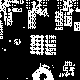

In [ ]:
img = cv2.imread("/content/drive/MyDrive/ENEE 439D Final Project/Aerospace PCB Our Pics/nodefect_cropped/20.JPG")
cv2_imshow(preprocess(img, noise=True, noiseFactor=0) * 255)

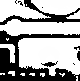

In [ ]:
img = cv2.imread("/content/drive/MyDrive/ENEE 439D Final Project/PCB_DATASET/reconstruct/defect/1.png")
cv2_imshow(preprocess(img, noise=True, noiseFactor=0) * 255)

In [5]:
def cutImageUp(img, w, h):
  rowRange = range(0, len(img)//w * w, w)
  colRange = range(0, len(img[0])//h * h, h)
  cutup = np.zeros(((len(rowRange)) * (len(colRange)), w, h, 1))
  index = 0
  for (ri, i) in enumerate(rowRange):
    for (ci, j) in enumerate(colRange):
      cutup[index] = np.reshape(img[i : (i + w), j : (j + h)], (w, h, 1))
      index = index + 1
  return cutup

In [6]:
def remove_shadows(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
  l, a, b = np.split(img, 3, axis=2)
  shadow_threshold, img = cv2.threshold(l,0,255,cv2.THRESH_OTSU+cv2.THRESH_BINARY)
  shadow_mask = l < shadow_threshold
  return shadow_mask

In [7]:
#image_path = '/content/drive/MyDrive/Senior Year/Spring 2023/ENEE439D/ENEE 439D Final Project/PCB_DATASET/defect/1.png'
image_path = '/content/drive/MyDrive/ENEE 439D Final Project/Aerospace PCB Our Pics/defect/1.JPG'
#image_path = '/content/drive/MyDrive/Senior Year/Spring 2023/ENEE439D/ENEE 439D Final Project/Aerospace PCB Our Pics/nodefect/1.jpg'
#image_path = '/content/drive/MyDrive/Senior Year/Spring 2023/ENEE439D/ENEE 439D Final Project/Aerospace PCB Our Pics/Copy of 4.JPG'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
print(np.shape(image))
#cv2_imshow(image)

(1454, 1600, 3)


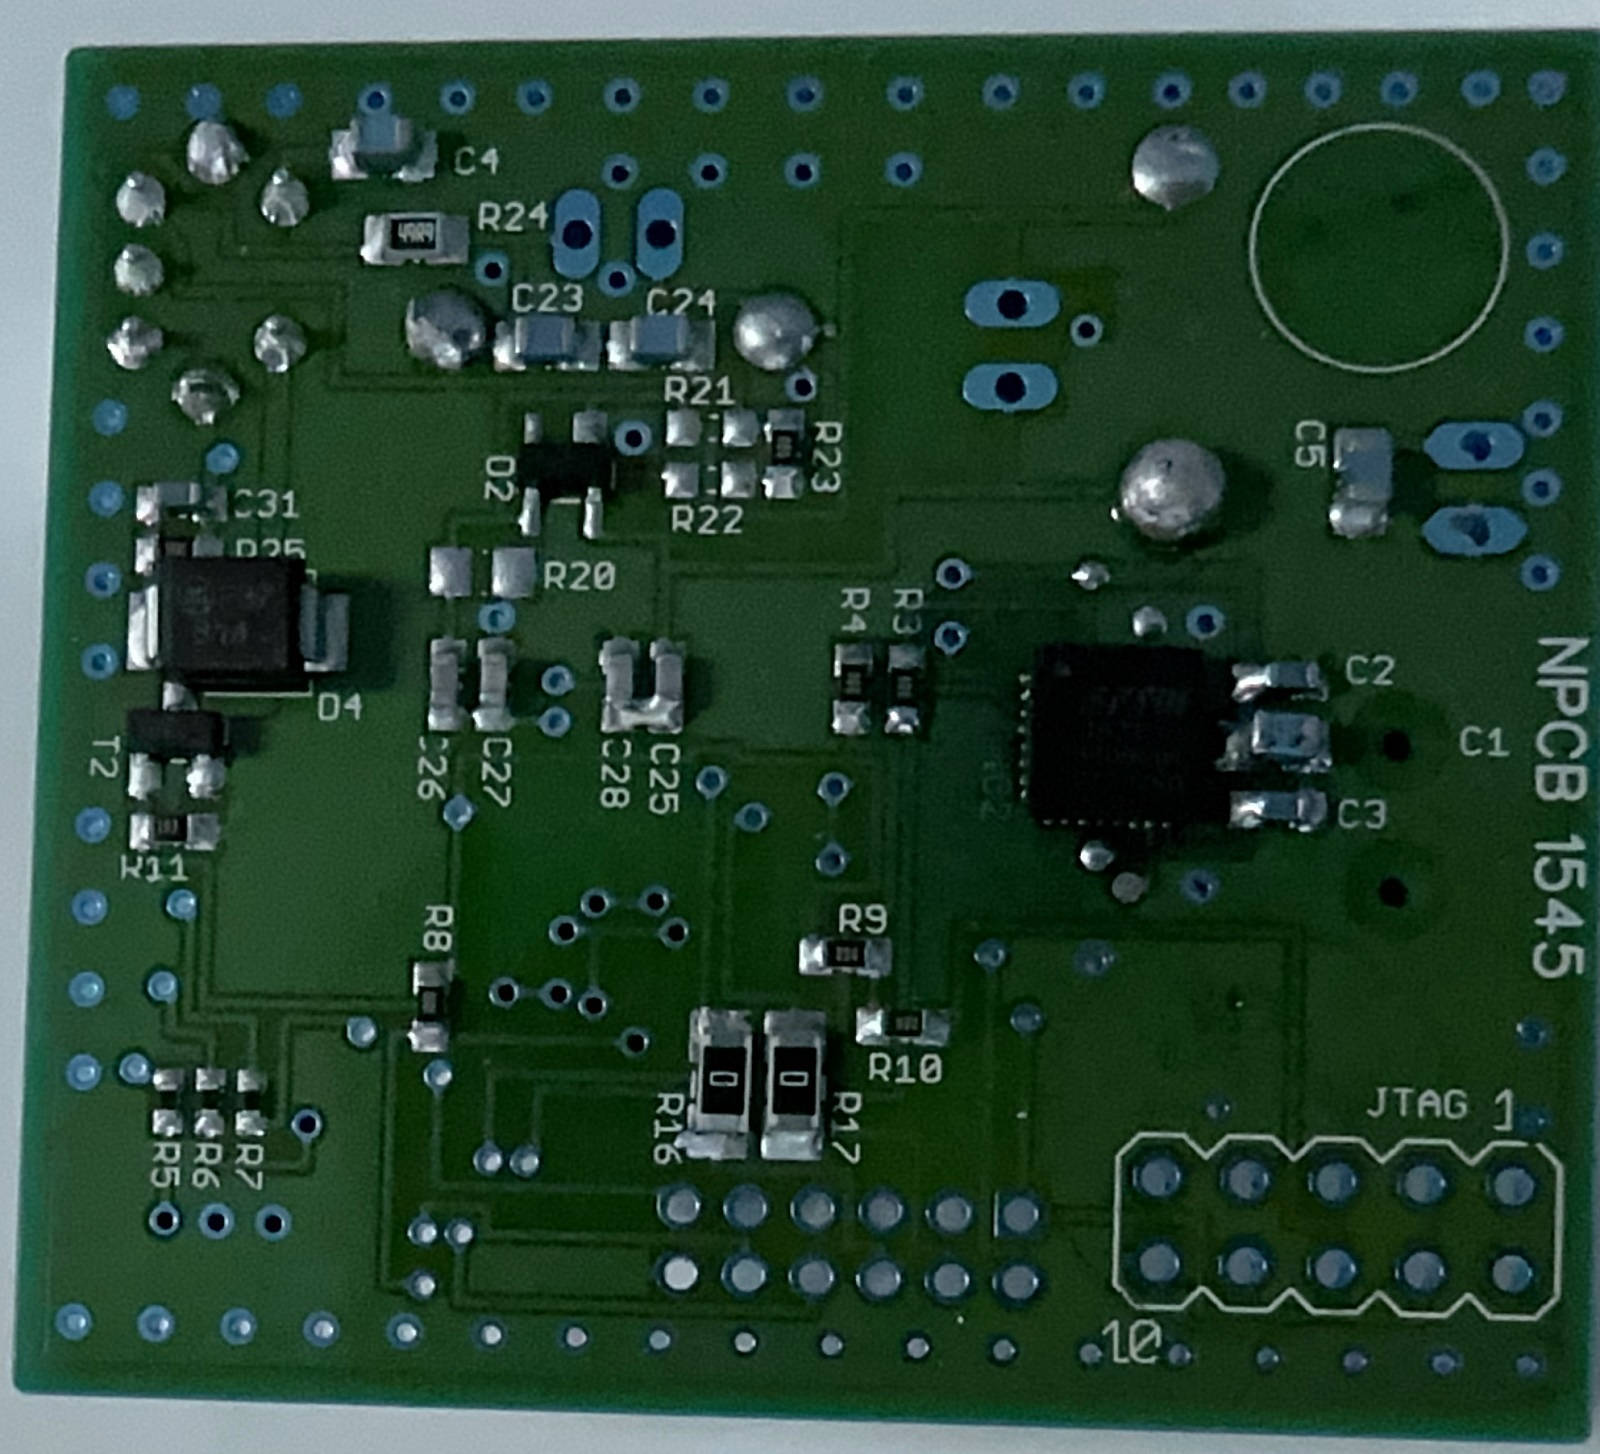

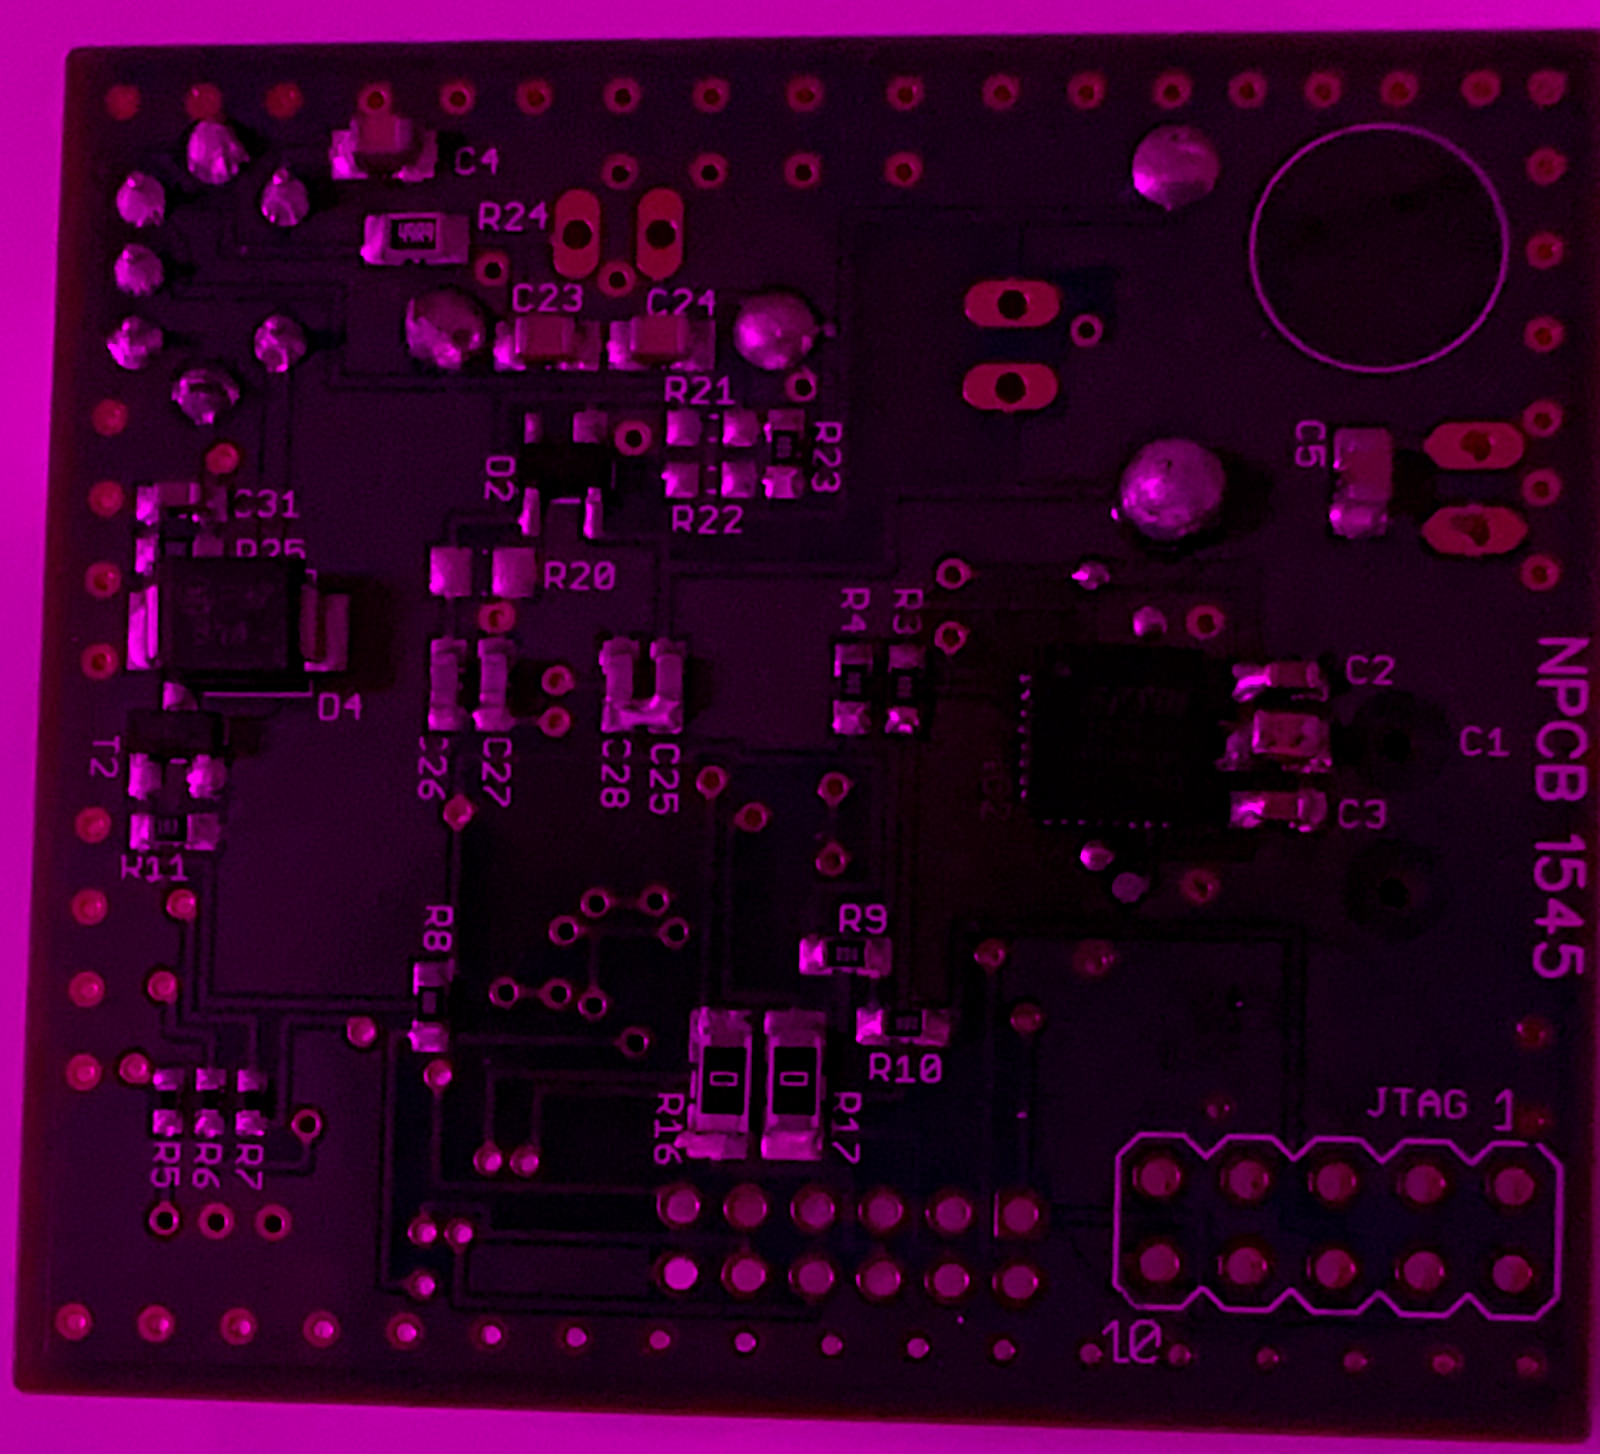

In [8]:
#cv2_imshow(image)
#new_img = cutImageUp(image,200,200)[1]

#RGB Split G = 0
rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
r,g,b = cv2.split(rgb_img)
for i in range(len(g)):
  for j in range(len(g[i])):
    g[i][j] = 0
rgb_split = np.concatenate((r,g,b),axis=1)
#cv2_imshow(rgb_split)
rgb = np.dstack((b,g,r))
cv2_imshow(rgb_img)
cv2_imshow(rgb)

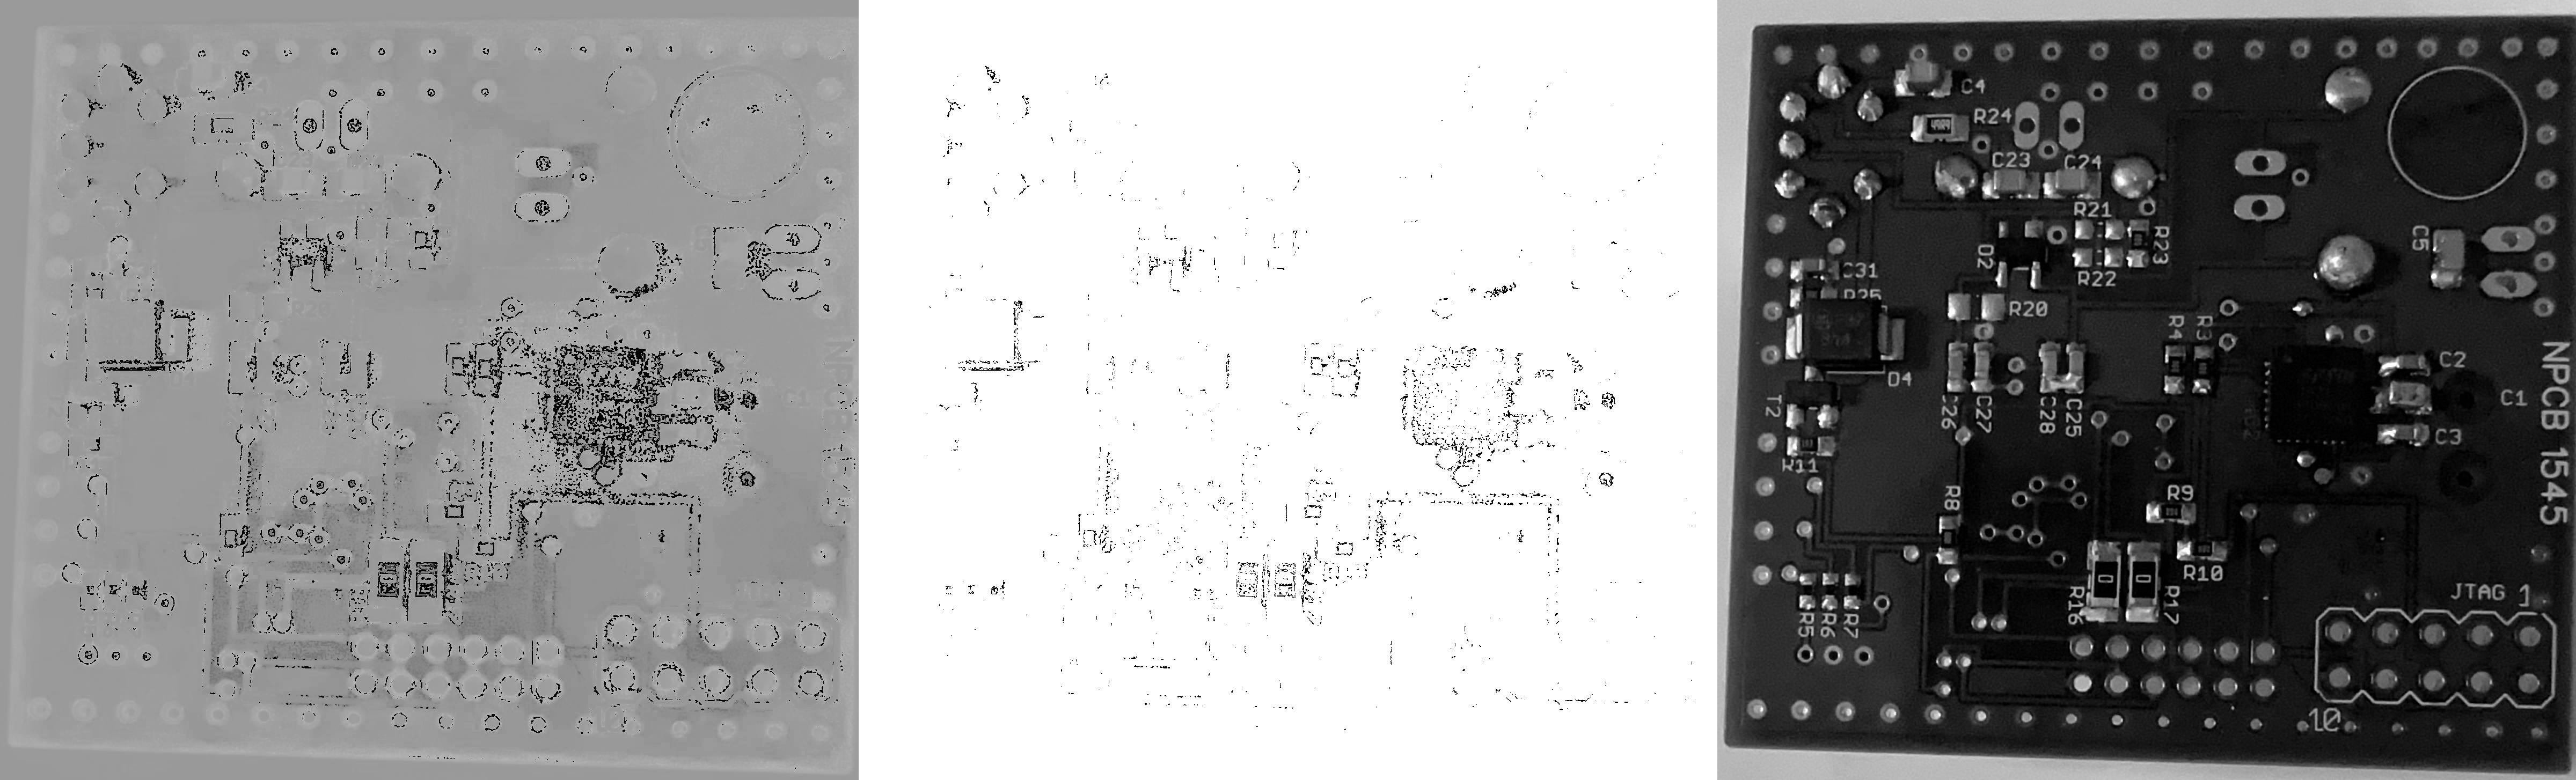

In [9]:
new_img = preprocess(rgb)
#shadow_mask = remove_shadows(new_img)
#shadow_mask = shadow_mask[:,:,0]
#cv2_imshow(rgb)
hsv_img = cv2.cvtColor(rgb, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hsv_img)
hsv_split = np.concatenate((h,s,v),axis=1)

#cv2_imshow(hsv_img)
cv2_imshow(hsv_split)

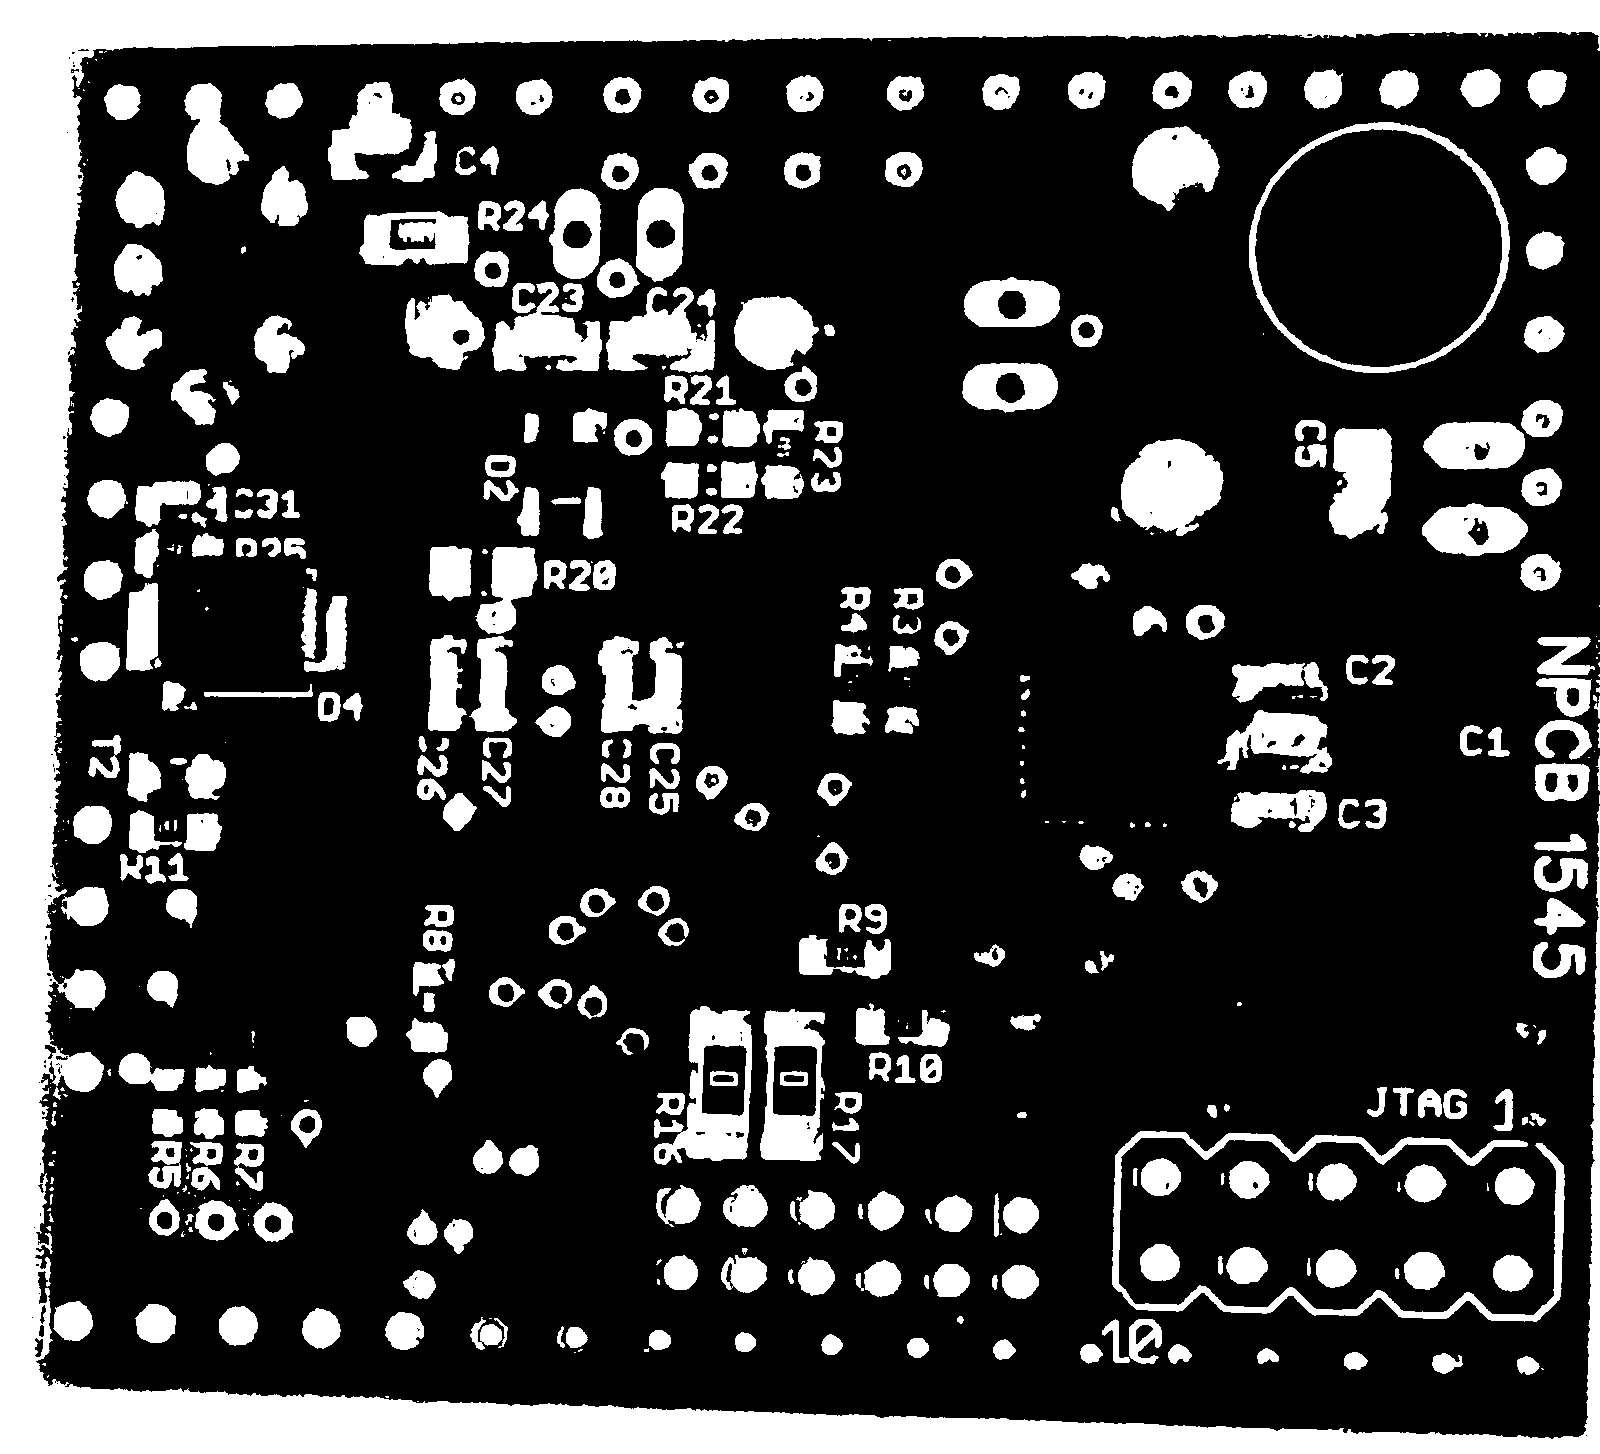

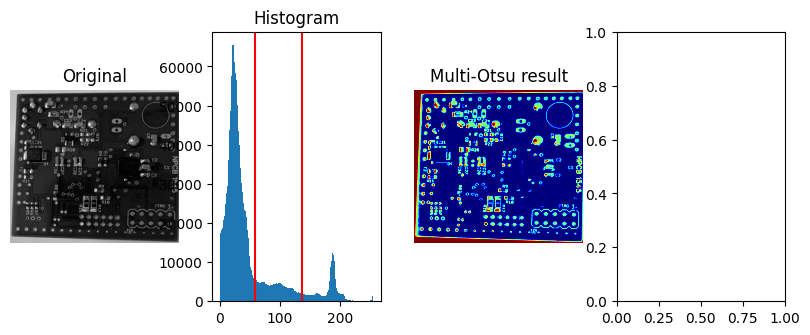

In [11]:
thresholds = threshold_multiotsu(v, classes=3)

# Using the threshold values, we generate the three regions.
regions = np.digitize(v, bins=thresholds)
#mask = (shadow_mask ^ regions)
cv2_imshow(regions*255)
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(v, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(v.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

#ax[3].imshow(mask)
#ax[3].set_title('Shadow Mask XOR Regions')

plt.subplots_adjust()

plt.show()